# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

### **ATIVIDADE PRÁTICA 02 [Extração e Pré-processamento de Dados + Expressões Regulares]**


A **ATIVIDADE PRÁTICA 02** deve ser feita utilizando o **Google Colab** com uma conta
sua vinculada ao Gmail. O link do seu notebook, armazenado no Google Drive, além do link de um repositório no GitHub e os principais resultados da atividade, devem ser enviados usando o seguinte formulário:

> https://forms.gle/83JggUJ1mhgWviEaA


**IMPORTANTE**: A submissão deve ser feita até o dia 16/10 (segunda-feira) APENAS POR UM INTEGRANTE DA EQUIPE, até às 23h59. Por favor, lembre-se de dar permissão de ACESSO IRRESTRITO para o professor da disciplina de PLN.

### **EQUIPE**

---

**POR FAVOR, PREENCHER OS INTEGRANDES DA SUA EQUIPE:**


**Integrante 01:**

`Nome: João Hugo Martins da Luz RA: 11202021919`

**Integrante 02:**

`Nome: Matheus Assis Gussiardi RA: 11202021758`


### **LIVRO**
---

`Processamento de Linguagem Natural - Conceitos, Técnicas e Aplicações em Português.`

>

Disponível gratuitamente em:
  
  > https://brasileiraspln.com/livro-pln/1a-edicao/.


**POR FAVOR, PREENCHER OS CAPITULOS SELECIONADOS PARA A SUA EQUIPE:**

`Primeiro capítulo: 2`

`Segundo capítulo: 24`



### **DESCRIÇÃO**
---

\Implementar um `notebook` no `Google Colab` para identificar ERROS em 2 (DOIS) capítulos do livro **Processamento de Linguagem Natural - Conceitos, Técnicas e Aplicações em Português**.

Os capítulos devem ser selecionados na seguinte planilha:

https://docs.google.com/spreadsheets/d/1ZutzQ3v1OJgsgzCvCwxXlRIQ3ChXNlHNvB63JQvYsbo/edit?usp=sharing

>

**IMPORTANTE:** É obrigatório usar o e-mail da UFABC.

>


**DICA:** Por favor, insira o seu nome ou da sua equipe na ordem definida na planilha. Por exemplo, se a linha correspondente ao o GRUPO 5 já foi preenchida, a próxima equipe (GRUPO 6) deverá ser informada na próxima linha da planilha.



### **TIPOS DE ERROS**
---


**IMPORTANTE**: consulta feita no ChatGPT
>

Um `programa Python` que utilize `expressões regulares` pode ajudar a identificar vários **tipos de erros** comuns em **livros**, especialmente erros de formatação e problemas relacionados à consistência do texto. Aqui estão alguns exemplos de erros comuns que podem ser identificados usando expressões regulares:

* Erros de gramática e ortografia: erros de digitação, concordância verbal e nominal, uso incorreto de pontuação e outros erros gramaticais.

* Problemas de formatação: você pode usar expressões regulares para encontrar erros de formatação, como espaços em excesso, tabulações inadequadas ou alinhamentos inconsistentes.

* Abreviações e acrônimos: você pode usar expressões regulares para encontrar abreviações ou acrônimos que não foram definidos ou explicados anteriormente no texto.

* Citações e referências: expressões regulares podem ser úteis para localizar citações ou referências que precisam de formatação especial.

* OUTROS TIPOS DE ERROS: não considerem apenas os tipos de erros citados acima.


**IMPORTANTE:** Lembre-se de que expressões regulares podem ser poderosas, mas também complexas. Dependendo da complexidade dos erros que você deseja identificar, pode ser necessário ajustar as expressões regulares de acordo com as características específicas do seu texto. Além disso, é importante ter em mente que as expressões regulares podem não ser a melhor ferramenta para todos os tipos de erros em livros, especialmente problemas mais contextuais ou semânticos, que podem exigir abordagens de PLN mais avançadas.





### **CRITÉRIOS DE AVALIAÇÃO**
---


A equipe que **realizar mais testes** e/ou **identificar mais erros** terá o peso diminuido na AVALIAÇÃO (Prova Escrita) em **25%** (caindo de 40 para 30). Os testes e possíveis erros devem ser contabizados de maneira separada.

>

Além disso, **por se tratar de um livro**, há um teste importante que deve ser feito. Lembre-se que o teste deve ser feito utilizando expressões regulares. A equipe que realizar esse teste, mesmo que o erro não ocorra nos capítulos selecionados, terá o peso diminuido na AVALIAÇÃO (Prova Escrita) em **25%** (caindo de 40 para 30).

> A equipe pode considerar outros capítulos do livro para tentar identificar esse tipo de erro.

**Se for a mesma equipe, o peso da avaliação será reduzido em 50% (caindo de 40 para 20)**.

>

**IMPORTANTE**: a diminuição no peso da AVALIAÇÃO será aplicado para todos os membros da equipe. Esse critério será aplicado apenas para uma equipe, considerando como critério de desempate a equipe que entregar primeiro a atividade no formulário.





### **IMPLEMENTAÇÃO**
---

#### **Extração dos Textos**

In [37]:
# por favor, inserir o código a partir daqui...

import requests
from bs4 import BeautifulSoup as bs
import json
import codecs

#função para traduzir caracteres unicode como "\u00e1" para "á"
def decode_unicode_escape(input_string: str or list):

    # se input_string for uma lista, então decodifique cada item da lista e retorne a lista
    if isinstance(input_string, list):
        return [str(item).encode('unicode-escape').decode('unicode-escape') for item in input_string]

    # returna a string decodificada
    return str(input_string).encode('unicode-escape').decode('unicode-escape')

#função para extrair textos html
def extractText(response):

    # cria um dicionário para armazenar os dados
    website_data = {}

    # extrai o html da página
    soup = bs(response.content, 'html.parser')

    # extrai o titulo da seção do livro
    book_headlines = soup.find_all('h1', {"class": "title"})
    # extrai o texto do titulo extraido acima
    book_headline_text = [headline.text for headline in book_headlines]
    # decodifica os caracteres unicode dos textos extraídos
    book_headline_text = decode_unicode_escape(book_headline_text)

    # extrai os parágrafos do titulo da seção do livro
    book_headline_paragraphs = soup.find("main", {"class": "content"}).find_all('p', recursive=False)
    # extrai o texto dos parágrafos extraidos acima
    book_headline_paragraphs_text = [p.text for p in book_headline_paragraphs]
    # decodifica os caracteres unicode dos textos extraídos
    book_headline_paragraphs_text = decode_unicode_escape(book_headline_paragraphs_text)

    # armazena os dados extraídos no dicionário
    website_data[0] = {}
    website_data[0]["book_headline"] = str(book_headlines)
    website_data[0]["book_headline_text"] = book_headline_text
    website_data[0]["book_headline_paragraphs"] = str(book_headline_paragraphs)
    website_data[0]["book_headline_paragraphs_text"] = book_headline_paragraphs_text

    # extrai as seções do livro
    book_sections = soup.find_all('section', {"class": "level2"})

    # contador para nomear as chaves do dicionário corretamente
    counter = 0
    # itera sobre as seções extraídas e coleta os dados presentes em cada uma delas
    for section in book_sections:
        # incrementa o contador
        counter += 1

        # extrai os títulos das seções
        headers = section.find_all(['h2', 'li'])
        headers_text = [str(header.text) for header in headers]
        headers_text = decode_unicode_escape(headers_text)

        # extrai os parágrafos das seções
        content = section.find_all('p')
        content_text = [str(p.text) for p in content]
        content_text = decode_unicode_escape(content_text)

        # armazena os dados extraídos no dicionário
        website_data[counter] = {}
        website_data[counter]["headers"] = str(headers)
        website_data[counter]["headers_text"] = headers_text
        website_data[counter]["content"] = str(content)
        website_data[counter]["content_text"] = content_text

    # armazenando o dicionário gerado em uma variável mais descritiva
    corpus = website_data

    return(corpus)

In [38]:
#extraindo capitulos necessarios p/ atividade

# monta o cabeçalho da solicitação para evitar o erros na requesição
HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

# faz a requisição do capitulo 2
response2 = requests.get('https://brasileiraspln.com/livro-pln/1a-edicao/parte2/cap2/cap2.html', headers=HEADERS)
# Verifica se a solicitação foi bem-sucedida
if response2.status_code == 200:
    print('Conexão bem-sucedida')
else:
    print('Erro na conexão')

# faz a requisição do capitulo 24
response24 = requests.get('https://brasileiraspln.com/livro-pln/1a-edicao/parte10/cap24/cap24.html', headers=HEADERS)
# Verifica se a solicitação foi bem-sucedida
if response24.status_code == 200:
    print('Conexão bem-sucedida')
else:
    print('Erro na conexão')

Conexão bem-sucedida
Conexão bem-sucedida


In [39]:
# extrai os dados dos capitulos e em seguida os imprime
cap2 = extractText(response2)
cap24 = extractText(response24)

print(f'''Capítulo 2 Data:\n\n{json.dumps(cap2, indent=4, ensure_ascii=False)}
          \n\n\n\n\n\n\n\n
          Capítulo24 Data:\n\n{json.dumps(cap2, indent=4, ensure_ascii=False)}''')

Capítulo 2 Data:

{
    "0": {
        "book_headline": "[<h1 class=\"title\"><span class=\"quarto-section-identifier\" id=\"sec-cap2\"><span class=\"chapter-number\">2</span>  <span class=\"chapter-title\">Texto ou fala?</span></span></h1>]",
        "book_headline_text": [
            "2  Texto ou fala?"
        ],
        "book_headline_paragraphs": "[]",
        "book_headline_paragraphs_text": []
    },
    "1": {
        "headers": "[<h2 class=\"anchored\" data-anchor-id=\"sec-cap2-intro\" data-number=\"2.1\"><span class=\"header-section-number\">2.1</span> Histórico e panorama da área</h2>]",
        "headers_text": [
            "2.1 Histórico e panorama da área"
        ],
        "content": "[<p>O processamento da língua falada depende de uma vasta gama de conhecimentos que inclui acústica, fonologia, fonética, linguística geral, semântica, sintaxe, pragmática, estruturas discursivas, entre outras. Para além disso, outros conhecimentos mais comuns à ciência da computação, à e

#### **Encontrar palavras escritas erroneamente usando tokens**
Separando os types contidos nos textos a fim de facilitar a visualização de palavras que podem estar escritas incorretamente. Para isso, vamos utilizar as stopwords para reduzir o vocabulário, e faremos uma nuvem de palavras para contribuir na visualização

In [40]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.tag.tnt import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# função para extrair os tokens de um corpus
def get_tokens(corpus):

    # lista para armazenar os tokens
    tokens = []

    # itera sobre todos os itens de texto do corpus e extrai seus tokens
    for section in corpus:
      for paragraph in corpus[section]:
        if "_text" in paragraph:
          try:
            tokens_aux = word_tokenize(str(corpus[section][paragraph]))
          except Exception as error:
            tokens_aux = 0
            print(f"Não foi possível tokenizar o paragrafo {paragraph} da seção {section}\nErro ocorrido: {error}")
          tokens.extend(tokens_aux)

    return tokens

stopwords = stopwords.words('portuguese')

# coleta dados de tokens, vocabulário e frequência do capítulo 2
tokens_cap2 = get_tokens(cap2)
tokens_cap2 = [elemento.lower() for elemento in tokens_cap2 if elemento not in stopwords]
vocabulary_cap2 = set(tokens_cap2)
frequency_cap2 = FreqDist(tokens_cap2)

# coleta dados de tokens, vocabulário e frequência do capítulo 24
tokens_cap24 = get_tokens(cap24)
tokens_cap24 = [elemento.lower() for elemento in tokens_cap24 if elemento not in stopwords]
vocabulary_cap24 = set(tokens_cap24)
frequency_cap24 = FreqDist(tokens_cap24)

print(f"Tokens Capitúlo 2: {tokens_cap2}")
print(f"Vocabulário Capitúlo 2: {sorted(vocabulary_cap2)}")
print(f"Tamanho do vocabulário Capitúlo 2: {len(vocabulary_cap2)}")
print(f"Frequencia de cada item do vocabulário Capitúlo 2: {sorted(frequency_cap2.most_common(449))}\n")

print(f"Tokens Capitúlo 24: {tokens_cap24}")
print(f"Vocabulário Capitúlo 24: {sorted(vocabulary_cap24)}")
print(f"Tamanho do vocabulário Capitúlo 24: {len(vocabulary_cap24)}")
print(f"Frequencia de cada item do vocabulário Capitúlo 24: {sorted(frequency_cap24.most_common(449))}")

Tokens Capitúlo 2: ['[', "'", '2\\xa0', 'texto', 'fala', '?', "'", ']', '[', ']', '[', "'", '2.1', 'histórico', 'panorama', 'área', "'", ']', '[', "'", 'o', 'processamento', 'língua', 'falada', 'depende', 'vasta', 'gama', 'conhecimentos', 'inclui', 'acústica', ',', 'fonologia', ',', 'fonética', ',', 'linguística', 'geral', ',', 'semântica', ',', 'sintaxe', ',', 'pragmática', ',', 'estruturas', 'discursivas', ',', 'outras', '.', 'para', 'além', 'disso', ',', 'outros', 'conhecimentos', 'comuns', 'ciência', 'computação', ',', 'engenharia', 'elétrica', ',', 'matemática', ',', 'psicologia', ',', 'necessários', '.', 'neste', 'contexto', ',', 'capítulo', 'visa', 'oferecer', 'panorama', 'área', 'habilidades', 'métodos', 'conhecidos', 'universo', 'processamento', 'computacional', 'língua', 'falada', '.', "'", ',', "'desde", 'primórdios', 'surgimento', 'interação', 'falada', 'espécie', 'humana', 'dias', 'hoje', '–', 'podemos', 'afirmar', 'tranquilidade', ',', 'assim', 'futuro', 'imaginável', '–'

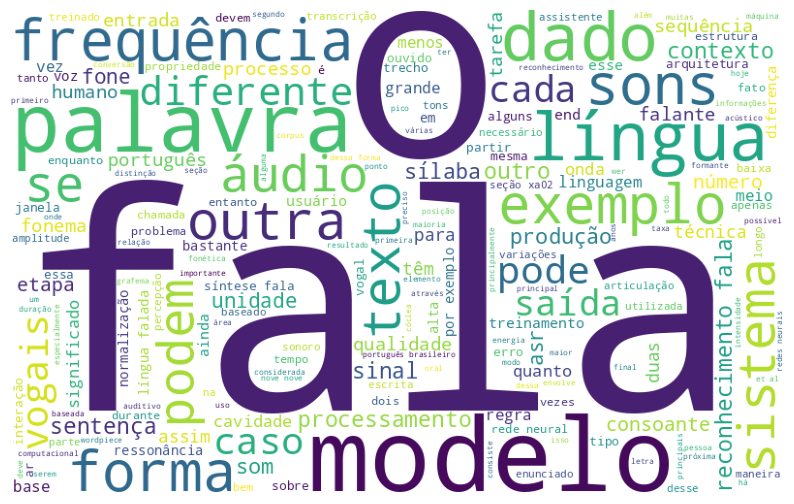

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# criar uma nuvem de palavras para o capítulo 2
nuvem_palavras_cap2 = WordCloud(width=800, height=500,
                           background_color='white',
                           random_state=42).generate(" ".join(tokens_cap2))

# exibe a nuvem de palavras
plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavras_cap2)
plt.axis("off")
plt.show()

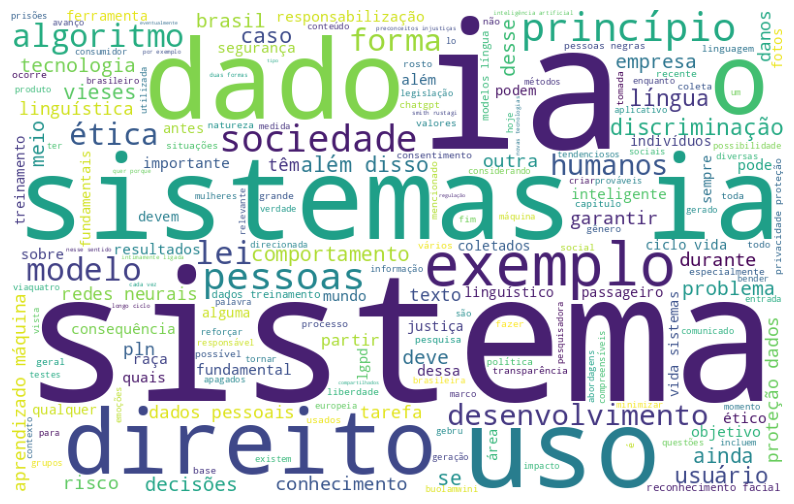

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# criar uma nuvem de palavras para o capitulo 24
nuvem_palavras_cap24 = WordCloud(width=800, height=500,
                           background_color='white',
                           random_state=42).generate(" ".join(tokens_cap24))

# exibe a nuvem de palavras
plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavras_cap24)
plt.axis("off")
plt.show()

#### **Encontrar erros por expressões regulares**

In [44]:
import re

#função para verificar e contar ocorrencia de erros
def check_errors(corpus: list = None, error_types: dict = None):
    error_counter = {name: 0 for name, regex in error_types.items()}

    # itera sobre todos os itens de texto do corpus e verifica a ocorrência de erros
    for sentence in corpus:
        for name, regex in error_types.items():
            occurrences = re.findall(regex, sentence)
            error_counter[name] += len(occurrences)

    # imprime os resultados encontados
    for name, count in error_counter.items():
        print(f"Quantidade de ocorrências de '{name}': {count}")

    return error_counter

In [45]:
#Expressões regulares criadas
typing_errors = {
    "Excesso de espaçamento": r'\s{2,} | \t$',
    "Excesso de pontuação": r'[!?.]{2,}',
    "Excesso de caracteres maiúsculas": r'\b\w*[A-Z]{2,}\w+\b | \b\w+[A-Z]{2,}\w*\b',
    "Palavras duplicadas (2 palavras iguais seguidas)": r'\b(\w+)\s+\1\b',
    "Falta de ponto final": r'\b\w$',
    "Falta de capitalização": r'\.\s[a-z] | ^[a-z]',
    "Numeros no meio de palavras": r'\b\w*\d+\w*\b',
    "Parentesis não fechados": r'[({\[][^)}\]]*$',
    "Falta de tabulação": r'^[^\t]',
    "Datas no formato dos USA": r'\b(0[1-9]|[10-12])\/(0[1-9]|[10-31])\/([1000-2999])\b'
}

grammatical_errors = {
    "Acentuação dupla": r'\b\w*[áàâéèêíïóôõöúç]+\w*[áàâéèêíïóôõöúç]+\w*\b',
    "N no lugar de M": r'\b\w*np\w*\b',
    "Abreviações": r'\b[^aeiouAEIOU\s]{3,}\b',
    "Falta de '~' em 'ção'": r'\w+çao\b'
}

In [46]:
#testando funcionalidade das expressões
teste =["palhaço palhaço  SEnpre!? Pássá ma1l,, mal1,)  1mal, brt. Palhação palhaçao palhaçao enrolação"]

check_errors(teste, typing_errors)
check_errors(teste, grammatical_errors)

Quantidade de ocorrências de 'Excesso de espaçamento': 0
Quantidade de ocorrências de 'Excesso de pontuação': 1
Quantidade de ocorrências de 'Excesso de caracteres maiúsculas': 0
Quantidade de ocorrências de 'Palavras duplicadas (2 palavras iguais seguidas)': 2
Quantidade de ocorrências de 'Falta de ponto final': 0
Quantidade de ocorrências de 'Falta de capitalização': 0
Quantidade de ocorrências de 'Numeros no meio de palavras': 3
Quantidade de ocorrências de 'Parentesis não fechados': 0
Quantidade de ocorrências de 'Falta de tabulação': 1
Quantidade de ocorrências de 'Datas no formato dos USA': 0
Quantidade de ocorrências de 'Acentuação dupla': 1
Quantidade de ocorrências de 'N no lugar de M': 1
Quantidade de ocorrências de 'Abreviações': 2
Quantidade de ocorrências de 'Falta de '~' em 'ção'': 2


{'Acentuação dupla': 1,
 'N no lugar de M': 1,
 'Abreviações': 2,
 "Falta de '~' em 'ção'": 2}

#### **Testando as expressões regulares criadas nos capítulos do texto**

In [47]:
typing_errors_sum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
grammatical_errors_sum = [0, 0, 0, 0]

# verificando erros presentes no Capítulo 2 do livro
for section in cap2:
    for paragraph in cap2[section]:
        if "_text" in paragraph:
            print("\n======================================================")

            print(f"\nErros de digitação no cap2 seção {section} {paragraph}:\n")

            typing_errors_dict = check_errors(cap2[section][paragraph], typing_errors)
            typing_errors_sum = [sum(item) for item in zip(typing_errors_sum, list(typing_errors_dict.values()))]

            print(f"\nErros gramaticais no cap2 seção {section} {paragraph}:\n")

            grammatical_errors_dict = check_errors(cap2[section][paragraph], grammatical_errors)
            grammatical_errors_sum = [sum(item) for item in zip(grammatical_errors_sum, list(grammatical_errors_dict.values()))]

            print("======================================================\n")

print("\nSoma total de erros de digitação no capítulo 2:")

for index in range(len(typing_errors_sum)):
    print(f"{list(typing_errors.keys())[index]}: {typing_errors_sum[index]}")

print("\nSoma total de erros gramaticais no capítulo 2:")

for index in range(len(grammatical_errors_sum)):
    print(f"{list(grammatical_errors.keys())[index]}: {grammatical_errors_sum[index]}")

print(f"\nSoma total de erros no capítulo 2: {sum(typing_errors_sum) + sum(grammatical_errors_sum)}")



Erros de digitação no cap2 seção 0 book_headline_text:

Quantidade de ocorrências de 'Excesso de espaçamento': 0
Quantidade de ocorrências de 'Excesso de pontuação': 0
Quantidade de ocorrências de 'Excesso de caracteres maiúsculas': 0
Quantidade de ocorrências de 'Palavras duplicadas (2 palavras iguais seguidas)': 0
Quantidade de ocorrências de 'Falta de ponto final': 0
Quantidade de ocorrências de 'Falta de capitalização': 0
Quantidade de ocorrências de 'Numeros no meio de palavras': 1
Quantidade de ocorrências de 'Parentesis não fechados': 0
Quantidade de ocorrências de 'Falta de tabulação': 1
Quantidade de ocorrências de 'Datas no formato dos USA': 0

Erros gramaticais no cap2 seção 0 book_headline_text:

Quantidade de ocorrências de 'Acentuação dupla': 0
Quantidade de ocorrências de 'N no lugar de M': 0
Quantidade de ocorrências de 'Abreviações': 0
Quantidade de ocorrências de 'Falta de '~' em 'ção'': 0



Erros de digitação no cap2 seção 0 book_headline_paragraphs_text:

Quantid

In [48]:
typing_errors_sum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
grammatical_errors_sum = [0, 0, 0, 0]

# verificando erros presentes no Capítulo 24 do livro
for section in cap24:
    for paragraph in cap24[section]:
        if "_text" in paragraph:
            print("\n======================================================")

            print(f"\nErros de digitação no cap24 seção {section} {paragraph}:\n")

            typing_errors_dict = check_errors(cap24[section][paragraph], typing_errors)
            typing_errors_sum = [sum(item) for item in zip(typing_errors_sum, list(typing_errors_dict.values()))]

            print(f"\nErros gramaticais no cap24 seção {section} {paragraph}:\n")

            grammatical_errors_dict = check_errors(cap24[section][paragraph], grammatical_errors)
            grammatical_errors_sum = [sum(item) for item in zip(grammatical_errors_sum, list(grammatical_errors_dict.values()))]

            print("======================================================\n")

print("\nSoma total de erros de digitação no capítulo 24:")
for index in range(len(typing_errors_sum)):
    print(f"{list(typing_errors.keys())[index]}: {typing_errors_sum[index]}")

print("\nSoma total de erros gramaticais no capítulo 24:")
for index in range(len(grammatical_errors_sum)):
    print(f"{list(grammatical_errors.keys())[index]}: {grammatical_errors_sum[index]}")

print(f"\nSoma total de erros no capítulo 24: {sum(typing_errors_sum) + sum(grammatical_errors_sum)}")



Erros de digitação no cap24 seção 0 book_headline_text:

Quantidade de ocorrências de 'Excesso de espaçamento': 0
Quantidade de ocorrências de 'Excesso de pontuação': 0
Quantidade de ocorrências de 'Excesso de caracteres maiúsculas': 1
Quantidade de ocorrências de 'Palavras duplicadas (2 palavras iguais seguidas)': 0
Quantidade de ocorrências de 'Falta de ponto final': 0
Quantidade de ocorrências de 'Falta de capitalização': 0
Quantidade de ocorrências de 'Numeros no meio de palavras': 1
Quantidade de ocorrências de 'Parentesis não fechados': 0
Quantidade de ocorrências de 'Falta de tabulação': 1
Quantidade de ocorrências de 'Datas no formato dos USA': 0

Erros gramaticais no cap24 seção 0 book_headline_text:

Quantidade de ocorrências de 'Acentuação dupla': 0
Quantidade de ocorrências de 'N no lugar de M': 0
Quantidade de ocorrências de 'Abreviações': 1
Quantidade de ocorrências de 'Falta de '~' em 'ção'': 0



Erros de digitação no cap24 seção 0 book_headline_paragraphs_text:

Quan